# Housing Problem
This machine learning problem is based on a dataset that can be downloaded and described [here](https://archive.ics.uci.edu/ml/datasets/Housing). This dataset consist on 506 instances, each one with 14 attibutes.

The goal of the current task is to predict the cost of a new house based on a linear model, using the training dataset provided.

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

## Download dataset

In [2]:
import requests
URL = "https://storage.googleapis.com/pagina-personal.appspot.com/img_teaching/neural_networks/housing.data"
r = requests.get(URL)
with open("housing.data", "wb") as data:
    data.write(r.content)

## Dataset Import
The dataset is stored in a file named housing.data

In [4]:
import pandas as pd

COLUMNS=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"]
FEATURES = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT"]
LABEL = ["MEDV"]
    
dataset = pd.read_csv("housing.data", skiprows=1, names=COLUMNS)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM      506 non-null float64
ZN        506 non-null float64
INDUS     506 non-null float64
CHAS      506 non-null int64
NOX       506 non-null float64
RM        506 non-null float64
AGE       506 non-null float64
DIS       506 non-null float64
RAD       506 non-null int64
TAX       506 non-null float64
PRATIO    506 non-null float64
B         506 non-null float64
LSTAT     506 non-null float64
MEDV      506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [6]:
dataset["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

## Histograms of features

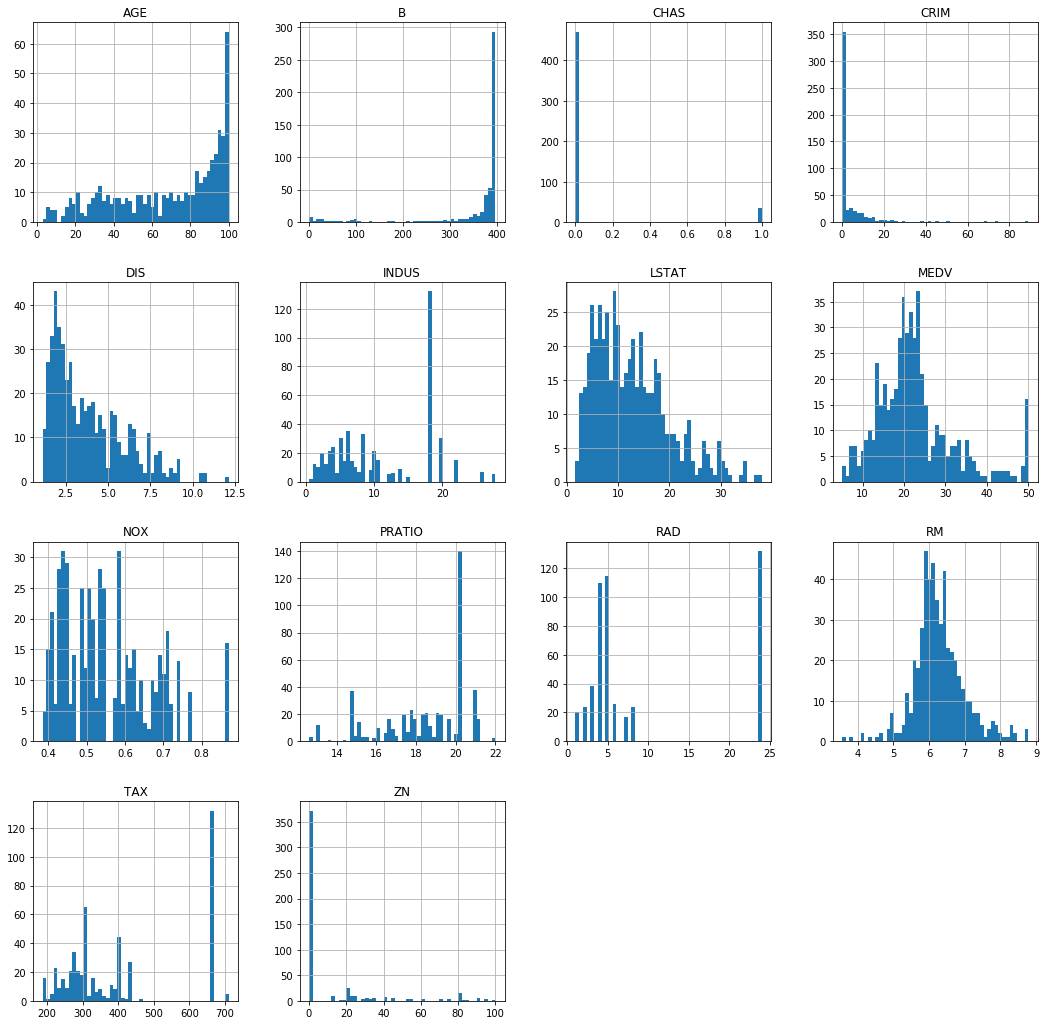

In [7]:
dataset.hist(bins=50, figsize=(18,18))
plt.show()

## Data Normalization
Change the ranges of the data so that all of them are in the same scale

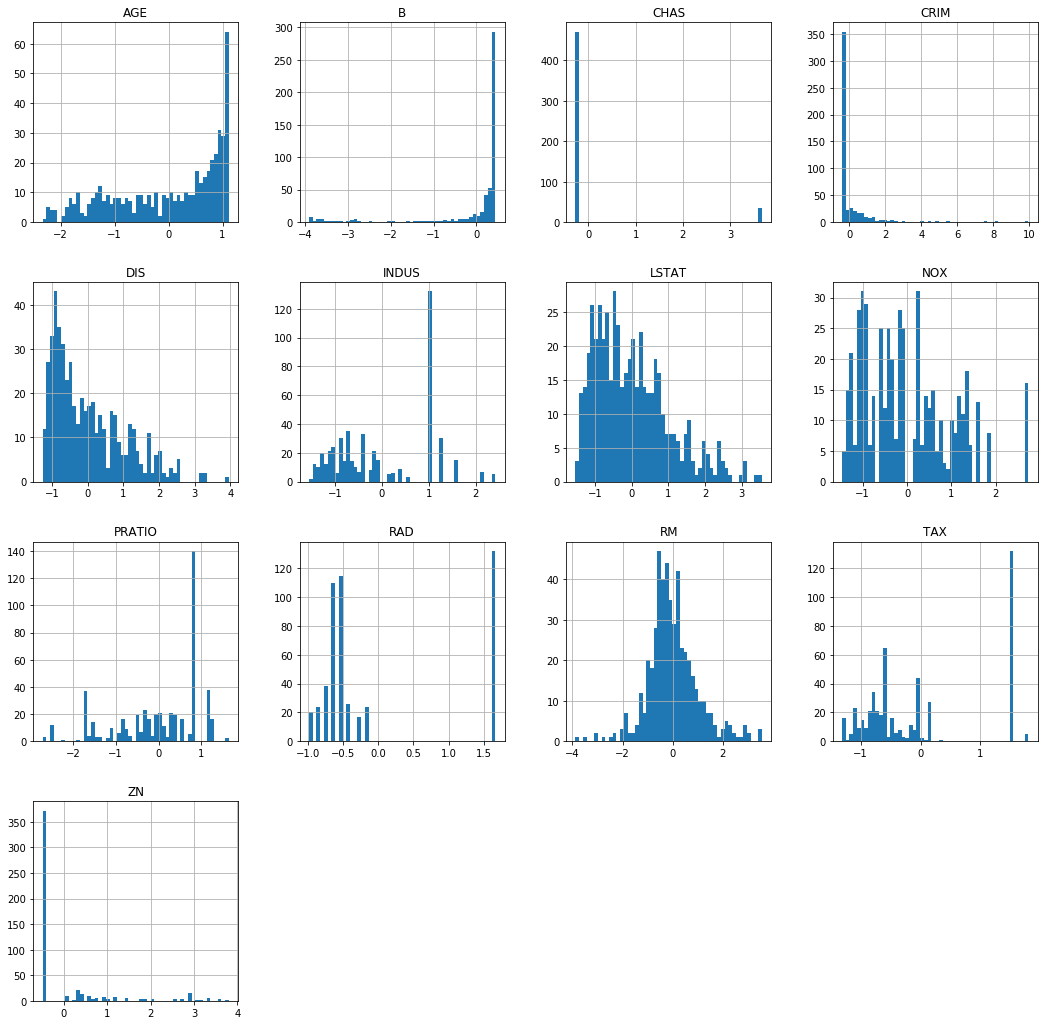

In [8]:
def feature_normalization(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset-mu)/sigma

features = dataset[dataset.columns[range(13)]]
labels = dataset[dataset.columns[13]]

normalized_features = feature_normalization(features)
normalized_features.hist(bins=50, figsize=(18,18))
normalized_labels = feature_normalization(labels)
plt.show()

## Random Sampling
Define a training and a testing dataset at random (80% training - 20% testing)

In [9]:
f = normalized_features.values
f = np.c_[np.ones(f.shape[0]), f]
l = normalized_labels.values

In [10]:
rnd_indices = np.random.rand(len(f)) < 0.90
train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)
print(train_x[0])

(457, 14) (457,)
(49, 14) (49,)
[ 1.         -0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743
  0.41367189 -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038
  0.44105193 -1.0755623 ]


## Learning
### Learning Parameters
Let us set the learning parameters for the optimization algoritm

In [11]:
learning_rate = 0.0001
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)
display_step = 100

### Define placeholders and variables

In [12]:
n_train_samples = train_x.shape[0]
n_dim = train_x.shape[1]
X = tf.placeholder(tf.float32,shape=(n_train_samples,n_dim))
Y = tf.placeholder(tf.float32,shape=(n_train_samples,))
W = tf.Variable(tf.random_normal(shape=(n_dim,1), mean=1, stddev=0.1))
init = tf.global_variables_initializer()

### Define the model

In [13]:
pred = tf.matmul(X,W)
cost = tf.reduce_sum(tf.square(pred-Y))/(2*n_train_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Training Time

In [14]:
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(optimizer, feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history, sess.run(cost, feed_dict={X:train_x,Y:train_y}))
    
    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_x, Y: train_y})
        print("Epoch:", '%04d'%(epoch+1), "cost=","{:.9f}".format(c))
        
print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_x, Y: train_y})
print("Training cost=",training_cost)


Epoch: 0100 cost= 246.004165649
Epoch: 0200 cost= 225.921844482
Epoch: 0300 cost= 223.695831299
Epoch: 0400 cost= 223.307617188
Epoch: 0500 cost= 223.226959229
Epoch: 0600 cost= 223.206268311
Epoch: 0700 cost= 223.199691772
Epoch: 0800 cost= 223.196624756
Epoch: 0900 cost= 223.195159912
Epoch: 1000 cost= 223.194747925
Optimization Finished!
Training cost= 223.195


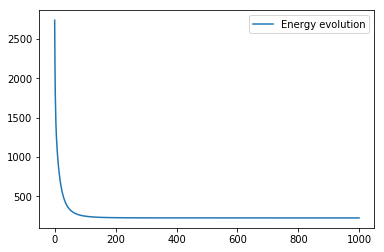

In [15]:
plt.plot(range(training_epochs),cost_history[1:], label="Energy evolution")
plt.legend()
plt.show()

# Testing

In [150]:
n_test_samples=test_x.shape[0]
X_test = tf.placeholder(tf.float32,shape=(n_test_samples,n_dim))
Y_test = tf.placeholder(tf.float32,shape=(n_test_samples,))

testing_cost = sess.run(tf.reduce_sum(tf.square(tf.matmul(X_test,W)-Y_test))/(2*n_test_samples), feed_dict={X_test: test_x, Y_test: test_y})
print("Testing cost=",testing_cost)
print("Absolute mean square loss difference:", abs(training_cost - testing_cost))



Testing cost= 24.0883
Absolute mean square loss difference: 204.914


Predicted house values

In [152]:
print(sess.run(tf.matmul(X_test,W), feed_dict={X_test: test_x}))

[[-0.01870856]
 [-0.01880088]
 [-0.01815752]
 [-0.01685678]
 [-0.01706873]
 [-0.01873666]
 [-0.01883685]
 [-0.02002838]
 [-0.0168839 ]
 [-0.02065452]
 [-0.0196417 ]
 [-0.01977554]
 [-0.01884641]
 [-0.01911939]
 [-0.01954452]
 [-0.02104419]
 [-0.02121001]
 [-0.01882803]
 [-0.0185716 ]
 [-0.01846698]
 [-0.01889573]
 [-0.01848901]
 [-0.01857173]
 [-0.01721114]
 [-0.01848417]
 [-0.01998706]
 [-0.02118597]
 [-0.01834979]
 [-0.01835148]
 [-0.01841235]
 [-0.01885353]
 [-0.01834334]
 [-0.01863797]
 [-0.01873181]
 [-0.01868554]
 [-0.01827593]
 [-0.0191776 ]
 [-0.0189251 ]]
